In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

from IPython.display import display, Latex

# Task 1

Applying the specified methods, implement algorithms for the numerical solution of a differential equation
$$
    y' = 0.2y + \frac{0.8}{x}
$$
with an initial condition $y(1) = 2$ on an interval $[1,10]$.


In [109]:
# Define IVP properties

def f(x, y):
    return 0.2 * y + 0.8 / x

y0 = 2.0
start = 1.0
end = 10.0

### Euler's Method

Consider the initial value problem
$$
    y' = f(x, y), \quad y(x_0)=y_0 .
$$

The linear approximation of $y(t_{n+1})$ using the Euler formula is
$$
    y(x_{n+1}) = y(x_{n})+ h * f(x, y)
$$
where $h = x_{n+1}-x_{n}$.

Therefore, to find the values of the function $y$ at all $x_n$, given $y_0$ and $f(x, y)$, we can start with finding $y(x_1)$ using the Euler’s formula and repeat the process through a for loop for $y(x_2)$, $y(x_3)$, ... 


In [110]:
h = 0.5 # step size

X_euler = np.arange(start, end + 1e-12, h)
Y_euler = np.zeros(len(X_euler))
Y_euler[0] = y0

for i in range(len(X_euler) - 1):
    yi = Y_euler[i]
    xi = X_euler[i]
    Y_euler[i + 1] = yi + h * f(xi, yi) # Euler formula

df = pd.DataFrame({
    "iteration": [i for i in range(0, len(X_euler))],
    "x": X_euler,
    "y": Y_euler
})

styled = (
    df.style
    #   .set_caption("Euler's Method")
      .format({"x": "{:,.3f}", "y": "{:,.3f}"})
      .hide(axis="index")
)

display(Latex(rf"$h = {h}$"))
styled


<IPython.core.display.Latex object>

iteration,x,y
0,1.000,2.000
1,1.500,2.600
2,2.000,3.127
3,2.500,3.639
4,3.000,4.163
5,3.500,4.713
6,4.000,5.299
7,4.500,5.928
8,5.000,6.610
9,5.500,7.351


### Runge-Kutta's Method


In [111]:
# ...

### Adam's Method

In [112]:
# ...

### Cauchy problem solution by `scipy` toolkit

In [ ]:
X_exact = np.linspace(start, end, 200)

sol = solve_ivp(
    f, (start, end), [2],
    t_eval=X_exact,
    method="RK45", # Runga-Kutta method of order 4-5
    rtol=1e-9,
    atol=1e-12
)

Y_exact = sol.y[0]

### Graphical plot of the obtained results

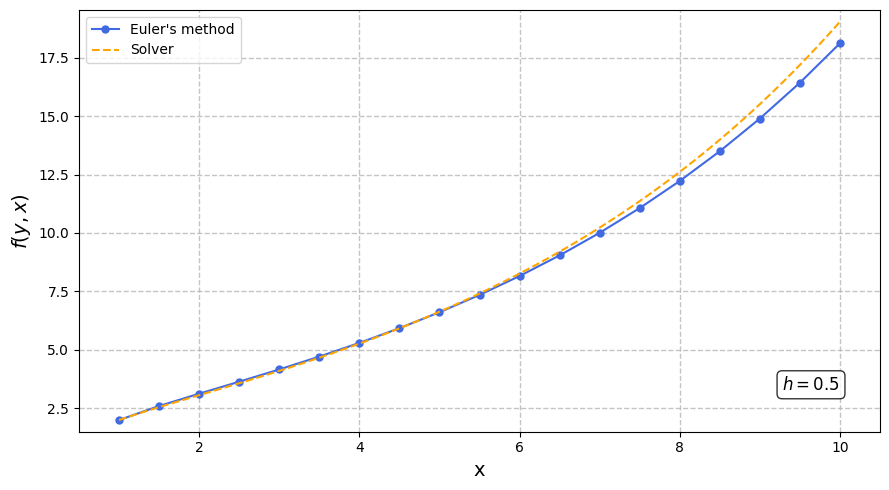

In [114]:
# Plotting
fig, ax = plt.subplots(figsize=(9, 5))

ymin = min(Y_euler.min(), Y_exact.min()) - 0.5
ymax = max(Y_euler.max(), Y_exact.max()) + 0.5
ax.set_ylim(ymin, ymax)
ax.set_xlim(start - 0.5, end + 0.5)


ax.set_xlabel("x", fontsize=14)
ax.set_ylabel(r"$f(y, x)$", fontsize=14)

# Grid
ax.grid(True, which="major", linestyle="--", linewidth=1.0, alpha=.75)

# Curves
ax.plot(
    X_euler, Y_euler,
    color="royalblue",
    marker='o',
    markersize=5,
    label="Euler's method"
)

ax.plot(
    X_exact, Y_exact,
    color="orange",
    linestyle="--",
    label="Solver"
)

h_str = rf"$h = {h:g}$"
ax.text(
    0.95, 0.09, h_str,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3")
)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()